# Desmistificando la transformada de ondeletas

<a href="https://juanfonsecasolis.github.io/">Juan M. Fonseca-Solís</a> · Febrero 2021 · 5 min read

---

## Resumen

La transformada de ondeletas (o _wavelets_ como se conocen en inglés) es una herramienta de análisis de señales que fue concevida como alternativa a la transformada de fourier de corto plazo para resolver el problema del principio de incertidumbre de Heinserberg. Aplicado a procesamiento de señales, este principio estipula que al obtener mayor resolución frecuencial se obtiene menor resolución temporal, y vicerversa, lo cual es un problema para analizar señales con contenido espectral desconocido o cuando hay mezcladas frecuencias muy altas y muy bajas. También queremos saber qué pasa cuando se analizan señales semilares a una ondeleta (por ejemplo, la del sombrero mejicano). Amplia literatura se encuentra sobre el tema, pero queremos convencernos por nosotros mismos de la eficacia de este método. En este ipython notebook estudiamos un ejemplo usando la transformada de ondeletas undecimada o UWT (por sus siglas en inglés) para analizar un barrido de frecuencias en el tiempo, una señal difícil de analizar. Los resultas aún están por definirse...

# Introducción
Lorem ipsum...

# Desarrollo
Lorem ipsum...

El escalograma se define como... y a diferencia de un espectrograma... La magnitud espectral y no la fase...

Como lo explicamos en el notebook de [Evaluación de la pérdida de calidad del audio usando el codec Opus en tareas de auscultación remota](https://juanfonsecasolis.github.io/blog/JFonseca.evaluacionPerdidaCalidadAudioOpus.html), podemos crear un barrido de frecuencias de la siguiente manera:

In [123]:
from IPython.display import Audio
import numpy as np

Fs = 8000 # la tasa de muestreo de los equipos comerciales
rango = [20.0, Fs/2] # el rango promedio de audicion humano en Hz
T = 1.0 # segundos (t1-t0)

N = int(T*Fs)
n = np.arange(0,N)

t = np.linspace(0,T,int(T*Fs))
F0 = (rango[1]-rango[0])*n/N + rango[0]

x = np.sin(np.pi*F0/Fs*n) # f=F0/Fs: frecuencia discreta
y = np.sin(np.pi*500/(Fs/2)*n) + np.sin(np.pi*250/(Fs/2)*n) # f=F0/Fs: frecuencia discreta

print('Numero de muestras: %i' % (y.shape))
Audio(y, rate=Fs) 

Numero de muestras: 8000


Ahora, aplicamos la DWT a la señal generada y graficamos el escalogama:

Populating the interactive namespace from numpy and matplotlib
(31, 8000)


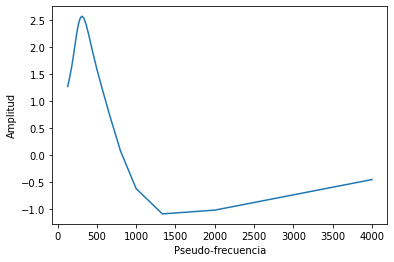

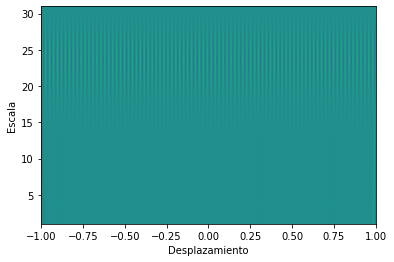

In [124]:
%pylab inline
from scipy import signal

widths = np.arange(1, 32)
cwtmatr = signal.cwt(y, wavelet=signal.ricker, widths=widths) # Continuous wavelet transform, Ricker=mexican hat

print(cwtmatr.shape)

plt.figure()
plt.plot(1.0/widths * Fs/2, cwtmatr[:,0])
plt.xlabel('Pseudo-frecuencia')
plt.ylabel('Amplitud')
plt.show()

plt.figure()
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], aspect='auto' # cmap='PRGn',
           ,vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.xlabel('Desplazamiento')
plt.ylabel('Escala')
plt.show()

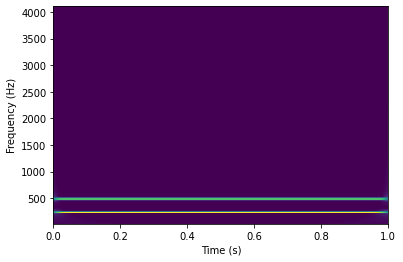

In [125]:
import numpy as np
import matplotlib.pyplot as plt

import obspy # pip3 install obspy
from obspy.imaging.cm import obspy_sequential
from obspy.signal.tf_misfit import cwt

scalogram = cwt(st=y, dt=1.0/Fs, w0=32, fmin=F0[0], fmax=F0[-1]) # morlet

ax = plt.figure().add_subplot(111)
x_axis, y_axis = np.meshgrid(t,np.logspace(np.log10(F0[0]), np.log10(F0[-1]), scalogram.shape[0]))
ax.pcolormesh(x_axis, y_axis, np.abs(scalogram), cmap=obspy_sequential, shading='auto')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
plt.show()

# Conclusiones
Lorem ipsum...

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br/>Este obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">licencia de Creative Commons Reconocimiento-NoComercial-SinObraDerivada 4.0 Internacional</a>. El sitio [juanfonsecasolis.github.io](https://juanfonsecasolis.github.io) es un blog dedicado a la investigación independiente en temas relacionados al procesamiento digital de señales. Para reutilizar este artículo y citar las fuente por favor utilice el siguiente Bibtex:

```
@online{Fonseca2021,
  author = {Juan M. Fonseca-Solís},
  title = {Desmistificando la transformada de ondeletas},
  year = 2021,
  url = {https://juanfonsecasolis.github.io/blog/JFonseca.wavelets.html},
  urldate = {}
}
```